In [124]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/home/toliman/.local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/toliman/.local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [125]:
word_index = reuters.get_word_index()
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reversed_word_index.get(i - 3, '?') for i in train_data[0]])

In [126]:
import numpy as np


def sequence_to_vector(sequences, dimension=10000):
    res = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        res[i, seq] = 1.
    return res

In [127]:
train_data = sequence_to_vector(train_data)
test_data = sequence_to_vector(test_data)

In [128]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [129]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [130]:
network = models.Sequential(
    [
        layers.Dense(92, activation='relu', input_shape=(10000,)),
        layers.Dense(92, activation='relu'),
        # layers.Dense(46, activation='relu'),
        layers.Dense(46, activation='softmax'),
    ]
)

In [131]:
from tensorflow.keras import optimizers

network.compile(
    optimizer=optimizers.Adam(learning_rate=.005),
    # optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy', ],
)

In [132]:
x_val = train_data[:1000]
partial_x_train = train_data[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [133]:
history = network.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=2 << 8,
    validation_data=(x_val, y_val),
)


Epoch 1/20
16/16 [==============================] - 1s 22ms/step - loss: 1.9973 - accuracy: 0.5678 - val_loss: 1.2568 - val_accuracy: 0.7230
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8820 - accuracy: 0.8006 - val_loss: 0.9705 - val_accuracy: 0.8010
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 0.4346 - accuracy: 0.9000 - val_loss: 0.9352 - val_accuracy: 0.8140

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


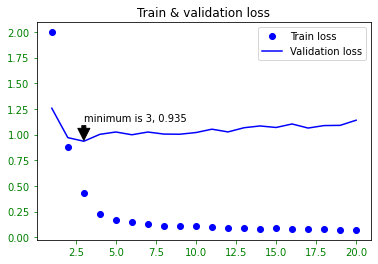

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


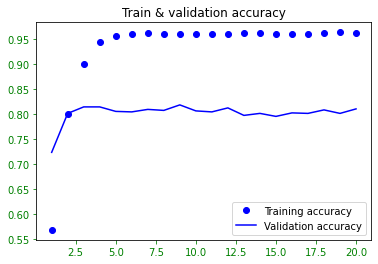

In [134]:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.tick_params(axis='x', colors='green')
plt.tick_params(axis='y', colors='green')


def epochs_count():
    return 20


epochs = list(range(1, epochs_count() + 1))

plt.plot(epochs, loss_values, 'bo', label='Train loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

min_val = min(val_loss_values)
min_val_x_ind = val_loss_values.index(min_val) + 1
min_val_x = val_loss_values[min_val_x_ind - 1]
plt.annotate(f'minimum is {min_val_x_ind}, {str(min_val)[:5]}', xy=(min_val_x_ind, min_val),
             xytext=(min_val_x_ind, min_val + 0.2),
             arrowprops=dict(facecolor='black', shrink=0.05), )

plt.title('Train & validation loss')

plt.legend()

plt.show()

plt.clf()

print(history_dict.keys())

acc_vales = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_vales, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Train & validation accuracy')
plt.tick_params(axis='x', colors='green')
plt.tick_params(axis='y', colors='green')
plt.legend()

plt.show()

In [135]:
p = network.predict(test_data)

In [136]:
print(np.sum(p[0]))
print(p[0])
print(np.argmax(p[0]))

1.0000001
[5.1179421e-07 1.3535445e-07 1.0391657e-10 9.8919046e-01 1.0031852e-02
 1.8355609e-13 1.7126238e-11 1.4209489e-09 2.4181258e-05 3.7754777e-08
 8.4615785e-08 1.3916561e-04 1.6276166e-09 2.4555675e-06 4.0168811e-09
 6.2334550e-08 1.4342922e-06 8.4969387e-10 2.7027577e-10 2.3168745e-04
 3.5402350e-04 3.0070160e-07 2.5566571e-09 2.3275520e-07 4.3369358e-12
 4.2488931e-08 5.5383567e-12 2.8087444e-11 8.6318913e-08 1.4241290e-07
 6.1382302e-08 9.7953567e-10 1.0574844e-07 3.3699099e-10 1.2437386e-08
 2.3197758e-11 2.2922561e-05 7.7616330e-10 3.4673828e-08 2.8602757e-08
 2.5041291e-09 1.5325526e-08 2.0971794e-10 1.7335730e-10 2.8043324e-08
 2.6533619e-12]
3
